In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file, and view columns

house_price = pd.read_csv("DS-Assignment-Part-1-data-set.csv")
house_price.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [3]:
house_price.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
house_price.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
house_price.shape

(414, 9)

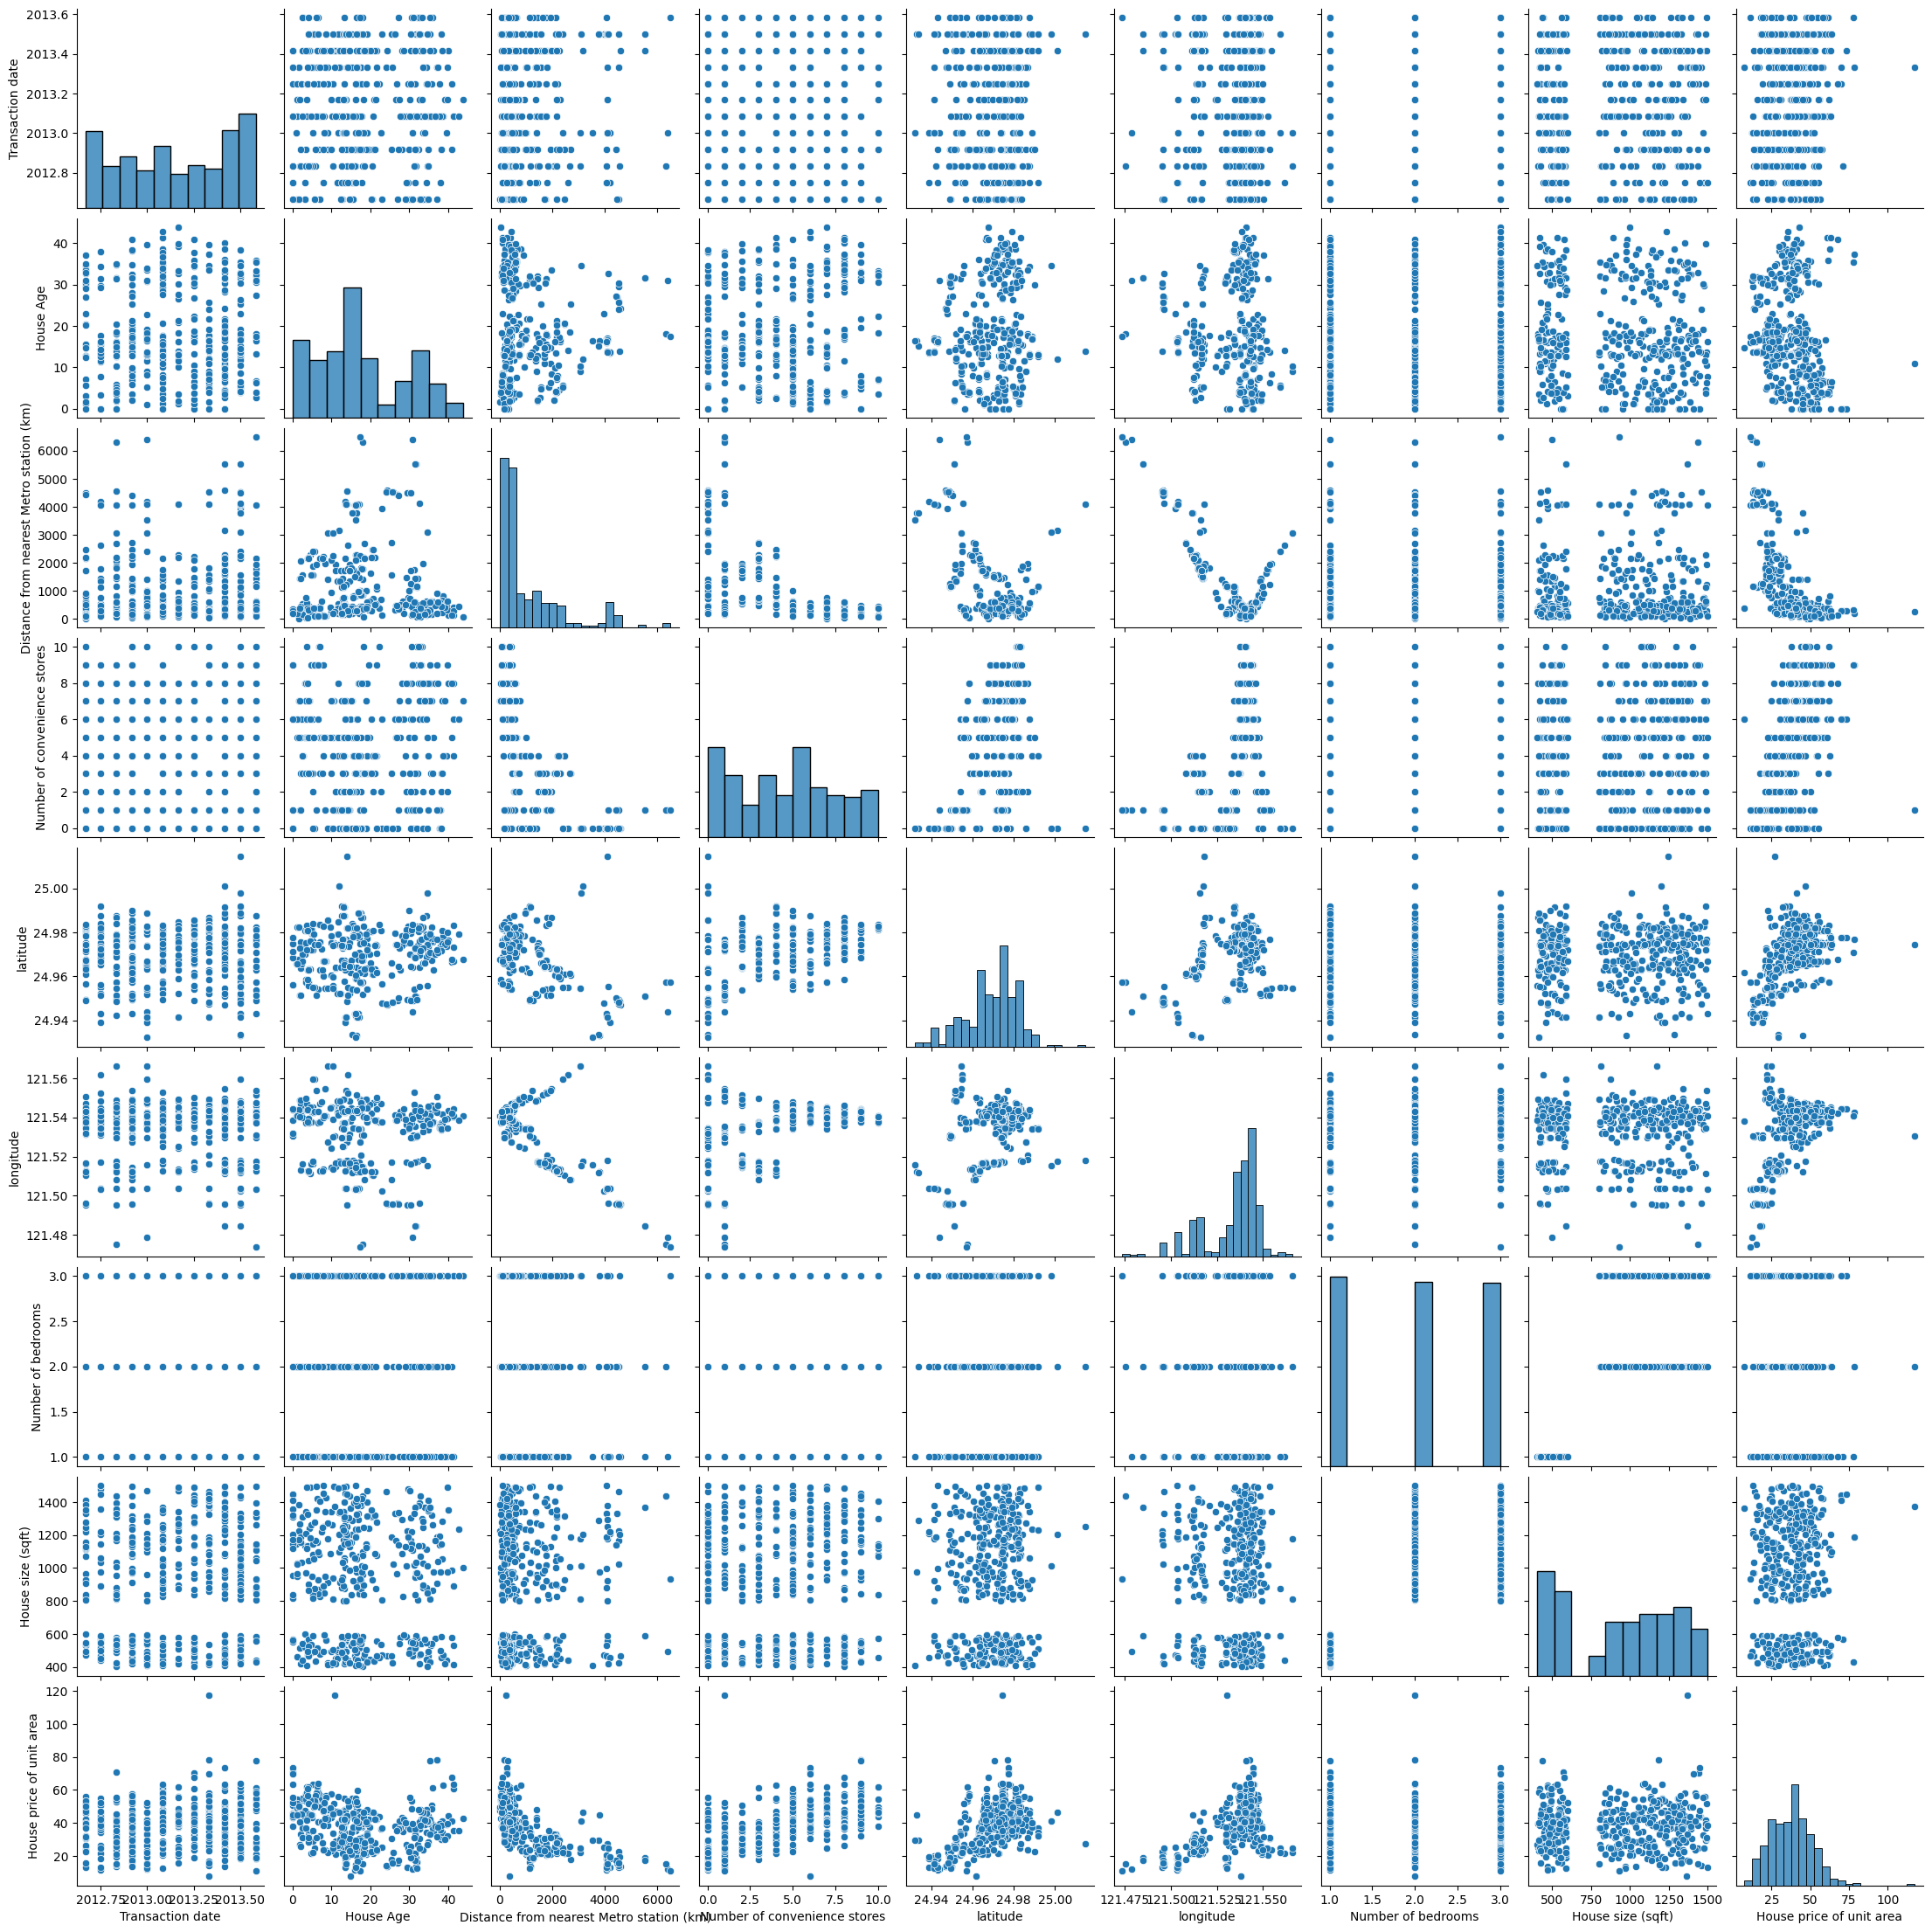

In [7]:
# Scatter Plot 

sns.pairplot(house_price)


<AxesSubplot: >

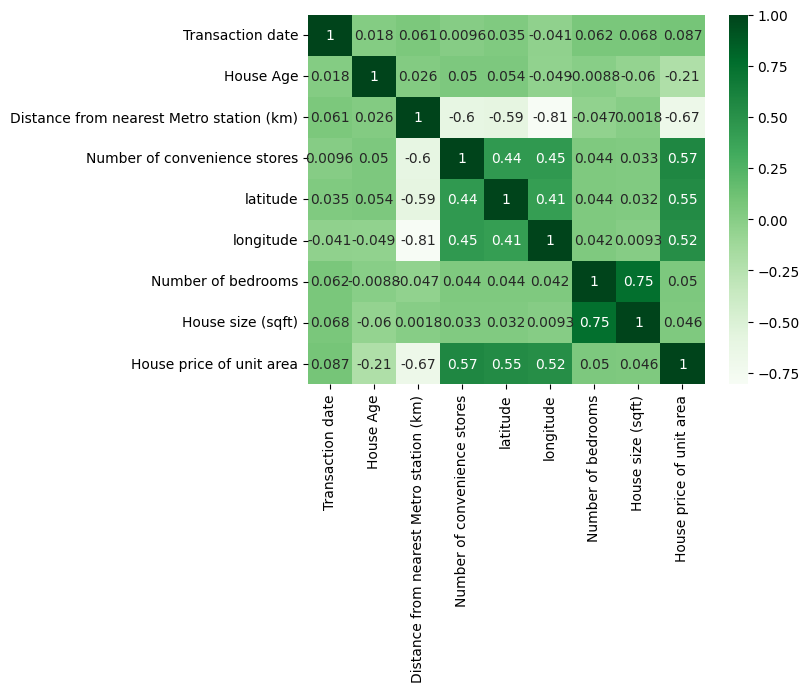

In [8]:
# Heatmap of all numberical variables against each other to check their co-relations

sns.heatmap(house_price.corr(),annot=True,cmap='Greens')


In [25]:
X = house_price[['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)']]
y = house_price['House price of unit area']

(414, 8)
(414,)


In [10]:
# Split the data into train and test and check their shape

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
coeff_house_price = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients'])

In [13]:
coeff_house_price

,Coefficients
Transaction date,6.577811
House Age,-0.289230
Distance from nearest Metro station (km),-0.005135
Number of convenience stores,1.055523
latitude,193.515029
longitude,-52.053939
Number of bedrooms,-0.385303
House size (sqft),0.000054


In [14]:
print(lr.score(X_train,y_train))

0.5583427979313569


In [15]:
y_train_pred = lr.predict(X_train)

In [16]:
# Residual Caculation

res = y_train-y_train_pred

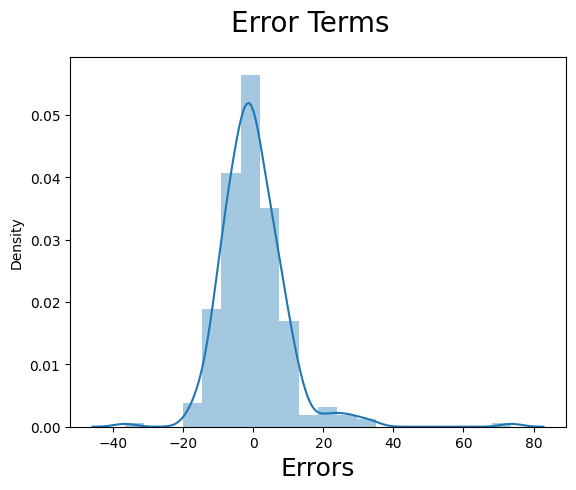

In [17]:
# Plot the distribution of errors

fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

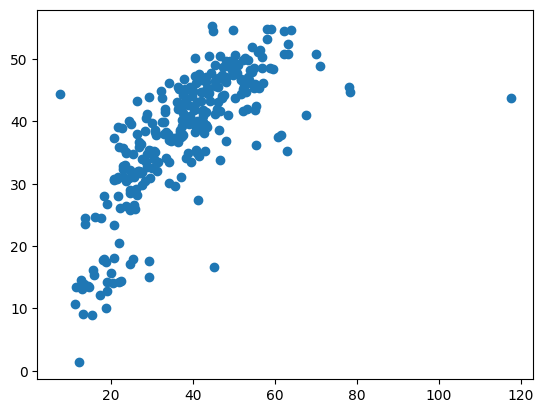

In [18]:
plt.scatter(y_train,y_train_pred)

In [19]:
y_pred = lr.predict(X_test)

In [20]:
print(lr.score(X_train,y_train))

0.5583427979313569


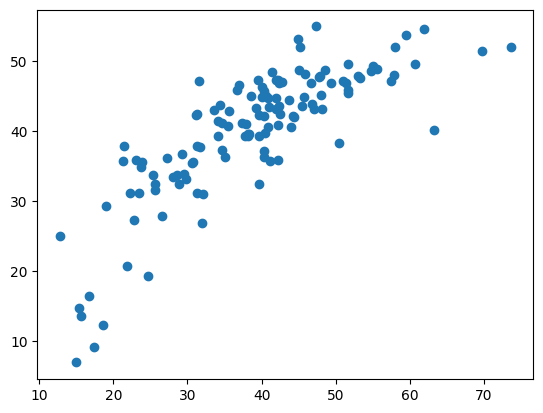

In [21]:
plt.scatter(y_test,y_pred)

In [22]:
# Residual Caculation

res = y_test-y_pred

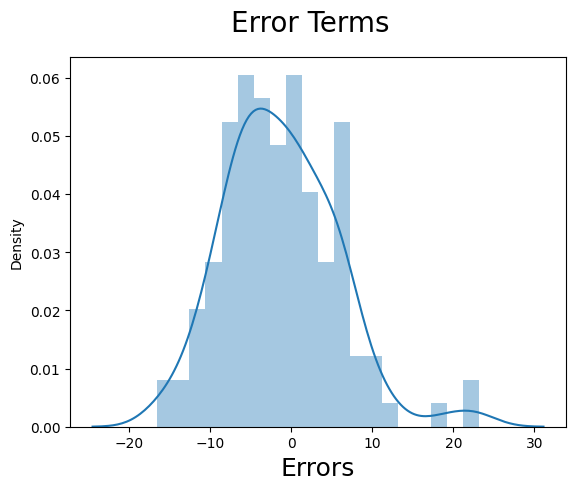

In [23]:
# Plot the distribution of errors

fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

In [24]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.601110
MSE,49.832635
RMSE,7.059223
